<a href="https://colab.research.google.com/github/SmithTheGreat/Machine-Learning-Projects/blob/main/Handwritten_Digit_Recognition_using_mnist_training_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import cv2
from keras.datasets import mnist

In [ ]:
from google.colab import files

In [ ]:
#Prepare training and test data
(train_X, train_y), (test_X, test_Y) = mnist.load_data()

In [ ]:
model= Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(11,activation='softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 11)                  │             363 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,971 (410.04 KB)

 Trainable params: 104,971 (410.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history = model.fit(train_X,train_y,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3985 - loss: 4.8816 - val_accuracy: 0.6586 - val_loss: 1.0573
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6885 - loss: 0.9750 - val_accuracy: 0.8052 - val_loss: 0.6598
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8086 - loss: 0.6107 - val_accuracy: 0.8451 - val_loss: 0.5233
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8663 - loss: 0.4400 - val_accuracy: 0.9249 - val_loss: 0.3239
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9343 - loss: 0.2534 - val_accuracy: 0.9362 - val_loss: 0.2414
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9512 - loss: 0.1857 - val_accuracy: 0.9428 - val_loss: 0.2223
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9597 - loss: 0.1518 - val_accuracy: 0.9522 - val_loss: 0.1851
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9656 - loss: 0.1245

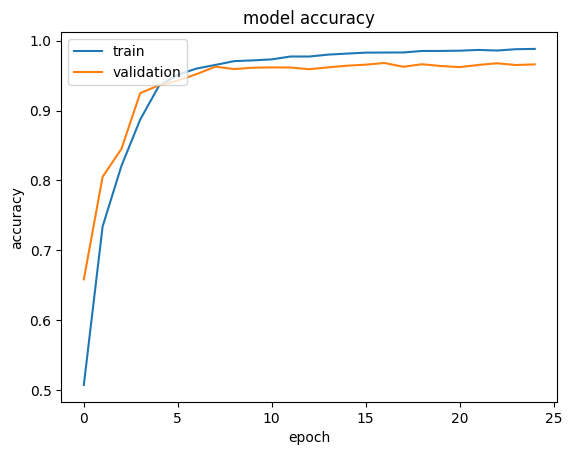

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

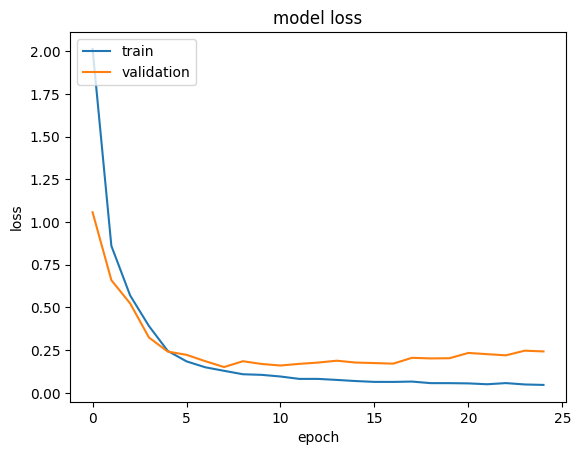

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Load a custom image
custom_img = files.upload()
# Read image in grayscale
custom_img = cv2.imread('7.png', cv2.IMREAD_GRAYSCALE)

# Resize to (28,28) instead of (20,20)
custom_img = cv2.resize(custom_img, (28, 28))

# Normalize pixel values
custom_img = custom_img / 255.0

# Flatten image to match input shape
custom_img_flat = custom_img.reshape(1, 28, 28, 1).astype(np.float32)  # Reshaped for model input
#use trained model to predict digit
prediction = model.predict(custom_img_flat)
print(prediction)
print(np.argmax(prediction))

Saving 7.png to 7.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[1.6682871e-03 8.7339786e-04 1.6116103e-03 1.3762608e-03 5.4744520e-04
  2.7501297e-03 5.4643542e-04 2.4225040e-04 9.8764300e-01 2.7410870e-03
  1.4727403e-08]]
8
